# Clase 9: Regression

In [1]:
%ls datasets/

adult.csv                  coches.csv     nhanes_2015_2016.csv
airline_data.csv           cwurData.csv   pokemon.csv
antropometria00.csv        data.csv       reg_data.csv
antropometria-dataset.csv  happiness.csv  sample_pivot.csv
Book3.csv                  headbrain.csv  students.csv
Canada.xlsx                mic2.xlsx      tips.csv
Cartwheeldata.csv          mic.xlsx       weight-height.csv
census.csv                 movies.csv


# Tipos de regresion 
1. regresion simple
2. resgresion multiple
3. regresion logistica

In [2]:
import pandas as pd

In [3]:
df = pd.read_csv('datasets/reg_data.csv')
df.head(15)

,Gender,Salary,Age,Place,Weight,Company,Academic_degree
0,Female,1500,33,Chicago,80.0,BMW,Bachelor
1,Female,1200,33,Chicago,82.5,Ford,No
2,Male,2200,34,New York,100.8,BMW,Bachelor
3,Male,2100,42,New York,90.0,BMW,Master
4,Female,1500,29,Chicago,67.0,Ford,Master
5,Female,1700,42,Washington,60.0,Ford,Master
6,Male,3000,50,Washington,77.0,Ford,No
7,Male,3000,55,Washington,77.0,Ford,Bachelor
8,Female,2800,31,New York,87.0,Ford,Bachelor
9,Male,2900,46,New York,70.0,GM,Master


In [4]:
pip install statsmodels

Note: you may need to restart the kernel to use updated packages.


In [5]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import numpy as np

In [7]:
pip install sklearn

Note: you may need to restart the kernel to use updated packages.


In [8]:
from sklearn import linear_model

In [9]:
df.columns

Index(['Gender', 'Salary', 'Age', 'Place', 'Weight', 'Company',
       'Academic_degree'],
      dtype='object')

# Descripción de base de datos
## Mis variables de interés
* 'Gender' : Variable categorica, explica los géneros de lso trabajadores
* 'Salary' : Variable numérica continua

# Pregunta de investigación 1: 
## Cómo afecta la edad en el salario?

esta pregunta podemos contestar con un modelo de regresion 

 Salary = b0 + b1*Age

* b0 es el salary cuando age no tiene impacto en salary

In [10]:
df.corr()

,Salary,Age,Weight
Salary,1.000000,0.616834,-0.080883
Age,0.616834,1.000000,-0.212340
Weight,-0.080883,-0.212340,1.000000


### Observación 
Al observar esta tabla de correlación, se puede ver: 
   1. 'Salary' y 'Age' tienen una correlación positiva (0.61834)

In [11]:
# y = b0 + b1*x1 + b2*x2...
#y = df['Salary']
#x = df['Age']

modelA = sm.OLS.from_formula('Salary ~Age', data = df)
resultA = modelA.fit()
resultA.summary()

/srv/conda/envs/notebook/lib/python3.7/site-packages/scipy/stats/stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=12
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.380
Model:                            OLS   Adj. R-squared:                  0.319
Method:                 Least Squares   F-statistic:                     6.142
Date:                Mon, 29 Nov 2021   Prob (F-statistic):             0.0326
Time:                        13:54:55   Log-Likelihood:                -91.514
No. Observations:                  12   AIC:                             187.0
Df Residuals:                      10   BIC:                             188.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    349.4458    790.373      0.442      0.668   -1411.614    2110.506
Age           48.0932     19.406      2.478      0.033       4.853      91.333
==============================================================================
Omnibus:                        0.406   Durbin-Watson:                   1.484
Prob(Omnibus):                  0.816   Jarque-Bera (JB):                0.479
Skew:                           0.321   Prob(JB):                        0.787
Kurtosis:                       2.261   Cond. No.                         205.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Observaciones
* R - Cuadrada : 0.38, por lo tanto 38% de Salary explicado por el modelo Salary = b0 + b1*'Age'

In [13]:
print('Salary of a person with Age 33 is', 349.4458 + 48.0932*33)
print('Su residual seria', 1500 - 1936.5214)
df.iloc[:2,:]

Salary of a person with Age 33 is 1936.5214
Su residual seria -436.5214000000001


,Gender,Salary,Age,Place,Weight,Company,Academic_degree
0,Female,1500,33,Chicago,80.0,BMW,Bachelor
1,Female,1200,33,Chicago,82.5,Ford,No


In [28]:
va = resultA.resid
va

0    -436.521924
1    -736.521924
2     215.384860
3    -269.360866
4    -244.149060
5    -669.360866
6     245.893407
7       5.427328
8     959.664508
9     338.266270
10    699.198429
11   -107.920161
dtype: float64

Text(45, 1500, ' Salary = 349.4458 + 48.0932*Age')

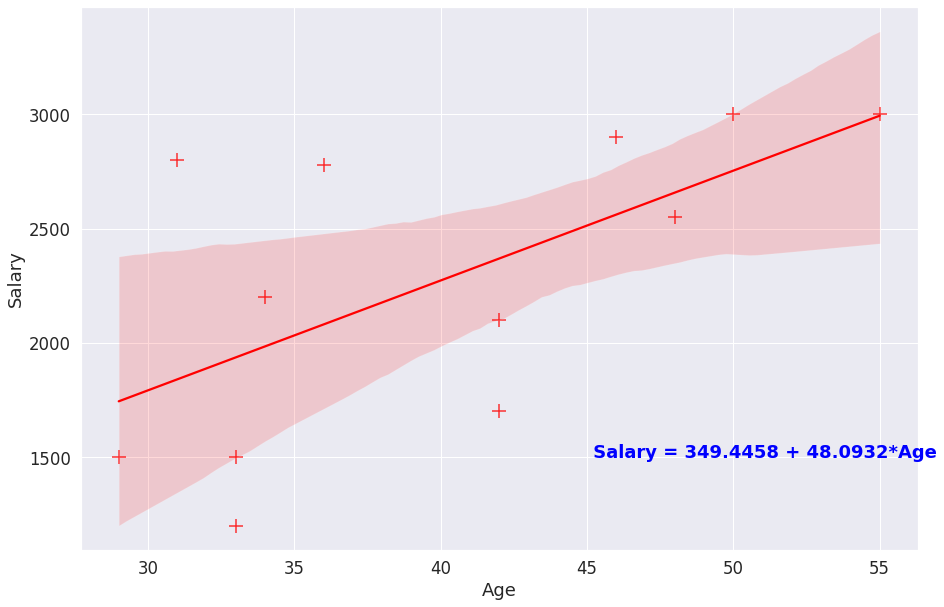

In [24]:
plt.figure(figsize = (15,10))
sns.set(font_scale = 1.5)
ax = sns.regplot(x = 'Age', 
            y = 'Salary',
            data =df,
           marker = '+',
            color = 'red',
            scatter_kws = {'s':200}
           )
ax.text(45,1500, ' Salary = 349.4458 + 48.0932*Age', 
        horizontalalignment = 'left', 
        size = 'medium', 
        color = 'blue', 
        weight = 'semibold'
       )

In [25]:
resi = resultA.resid
print(resi)


0    -436.521924
1    -736.521924
2     215.384860
3    -269.360866
4    -244.149060
5    -669.360866
6     245.893407
7       5.427328
8     959.664508
9     338.266270
10    699.198429
11   -107.920161
dtype: float64


In [26]:
resi.describe()

count    1.200000e+01
mean    -3.031649e-13
std      5.183902e+02
min     -7.365219e+02
25%     -3.111511e+02
50%     -5.124642e+01
75%      2.689866e+02
max      9.596645e+02
dtype: float64

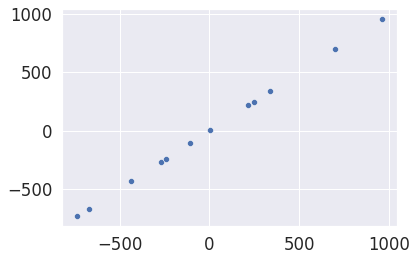

In [29]:
res = sns.scatterplot(x = va,
                     y = resi)

# Pregunta de investigación 2: 
## Cómo afecta la "Age" y género en el salario?

esta pregunta podemos contestar con un modelo de regresion 

 'Salary = b0 + b1*Age + b2*Gender'

* b0 es el salary cuando age no tiene impacto en salary
* b1 es el impacto de age en salary
* b2 es el impacto de gender en salary

In [31]:
modelB = sm.OLS.from_formula('Salary ~Age+Gender', data = df)
resultB = modelB.fit()
resultB.summary()

/srv/conda/envs/notebook/lib/python3.7/site-packages/scipy/stats/stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=12
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.408
Model:                            OLS   Adj. R-squared:                  0.276
Method:                 Least Squares   F-statistic:                     3.101
Date:                Mon, 29 Nov 2021   Prob (F-statistic):             0.0945
Time:                        14:21:14   Log-Likelihood:                -91.242
No. Observations:                  12   AIC:                             188.5
Df Residuals:                       9   BIC:                             189.9
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept        749.8157   1023.148      0.733      0.482   -1564.706    3064.337
Gender[T.Male]   306.7169    474.438      0.646      0.534    -766.535    1379.969
Age               34.2211     29.331      1.167      0.273     -32.130     100.573
==============================================================================
Omnibus:                        1.671   Durbin-Watson:                   1.363
Prob(Omnibus):                  0.434   Jarque-Bera (JB):                1.061
Skew:                           0.691   Prob(JB):                        0.588
Kurtosis:                       2.541   Cond. No.                         269.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Observaciones
* R - Cuadrada : 0.48, por lo tanto 48% de Salary explicado por el modelo Salary = b0 + b1*'Age' + b2*'Gender'



* Df Modelo: 2
    Salary = b0 + b1*'Age' + b2*'Gender
    Salary = b0 + b1*'Age' + b2*'Male' + b2*'Female'

    * b0 = 749.8157
    * b1 = 34.2211
    * b2 = 306.7169

### Case study
Df Modelo: 2
### Caso 1: Age = 33, Male = True

In [42]:
print('Salary of a person with Age 33 y Male', 749.8157 + 34.2211*34 + 306.7169*1 )
print('Su residual seria', 2200 - 2220.04999)
df.iloc[2:3,:]

Salary of a person with Age 33 y Male 2220.0499999999997
Su residual seria -20.04998999999998


,Gender,Salary,Age,Place,Weight,Company,Academic_degree
2,Male,2200,34,New York,100.8,BMW,Bachelor


In [43]:
resultB.resid

0    -379.112228
1    -679.112228
2     -20.050251
3    -393.819095
4    -242.227806
5    -487.102178
6     232.412060
7      61.306533
8     989.329983
9     269.296482
10    798.224456
11   -149.145729
dtype: float64

## Df Modelo : 2
# Case study 2: Age = 33, Male = False

In [47]:
print('Salary of a person with Age 33 y Male', 749.8157 + 34.2211*33 + 306.7169*0 )
print('Su residual seria', 1500 - 1879.112)
print('Su residual seria', 1200 - 1879.112)
df.iloc[:2,:]

Salary of a person with Age 33 y Male 1879.112
Su residual seria -379.1120000000001
Su residual seria -679.1120000000001


,Gender,Salary,Age,Place,Weight,Company,Academic_degree
0,Female,1500,33,Chicago,80.0,BMW,Bachelor
1,Female,1200,33,Chicago,82.5,Ford,No


# Pregunta de investigacion 3: 
## cual es el impacto de Age Gender y Academic degree en Salary?

'Salary = b0 + b1 * Age + b2 * Gender + b3 * Academic degre'

In [50]:
modelC = sm.OLS.from_formula('Salary ~ Age + Gender + Academic_degree', data = df)
resultC = modelC.fit()
resultC.summary()

/srv/conda/envs/notebook/lib/python3.7/site-packages/scipy/stats/stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=12
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.483
Model:                            OLS   Adj. R-squared:                  0.188
Method:                 Least Squares   F-statistic:                     1.636
Date:                Mon, 29 Nov 2021   Prob (F-statistic):              0.267
Time:                        14:50:34   Log-Likelihood:                -90.426
No. Observations:                  12   AIC:                             190.9
Df Residuals:                       7   BIC:                             193.3
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept                   815.5485   1086.544      0.751      0.477   -1753.721    3384.818
Gender[T.Male]              336.1028    521.798      0.644      0.540    -897.752    1569.958
Academic_degree[T.Master]  -373.1962    404.490     -0.923      0.387   -1329.664     583.271
Academic_degree[T.No]       -43.8495    470.054     -0.093      0.928   -1155.350    1067.651
Age                          36.3765     31.992      1.137      0.293     -39.272     112.025
==============================================================================
Omnibus:                        0.521   Durbin-Watson:                   0.971
Prob(Omnibus):                  0.771   Jarque-Bera (JB):                0.427
Skew:                           0.379   Prob(JB):                        0.808
Kurtosis:                       2.472   Cond. No.                         271.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Df : 4
Salary = b0 + b1*Age + b2*Gender + b3*Academic_degree
Salary = b0 + b1*Age + b2*(Male + Female) + b3*(Bachelor + No + Master)

* b0 = 815.5485
* b1 = 36.3765
* b2 = 336.1028
* b3 = -373.1962 #Master
* b3 = -43.8495 #No

# Caso de estudio
Df Modelo : 4
### Caso 1: Age = 48, Male = True, Academic_degree(Master) = True, Academic_degree(No= = False)


In [60]:
modelD = sm.OLS.from_formula('Salary ~ Age + Gender + Academic_degree', data = df)
resultD = modelD.fit()
resultD.summary()

/srv/conda/envs/notebook/lib/python3.7/site-packages/scipy/stats/stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=12
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.483
Model:                            OLS   Adj. R-squared:                  0.188
Method:                 Least Squares   F-statistic:                     1.636
Date:                Mon, 29 Nov 2021   Prob (F-statistic):              0.267
Time:                        14:57:04   Log-Likelihood:                -90.426
No. Observations:                  12   AIC:                             190.9
Df Residuals:                       7   BIC:                             193.3
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept                   815.5485   1086.544      0.751      0.477   -1753.721    3384.818
Gender[T.Male]              336.1028    521.798      0.644      0.540    -897.752    1569.958
Academic_degree[T.Master]  -373.1962    404.490     -0.923      0.387   -1329.664     583.271
Academic_degree[T.No]       -43.8495    470.054     -0.093      0.928   -1155.350    1067.651
Age                          36.3765     31.992      1.137      0.293     -39.272     112.025
==============================================================================
Omnibus:                        0.521   Durbin-Watson:                   0.971
Prob(Omnibus):                  0.771   Jarque-Bera (JB):                0.427
Skew:                           0.379   Prob(JB):                        0.808
Kurtosis:                       2.472   Cond. No.                         271.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [54]:
print('Salary of a person with Age 48 y Male con Masters', 815.5485 + 36.3765*48 + -373.1962*1 + -43.8495*0)
print('Su residual seria', 2550 - 2188.4243)

df.iloc[:,:]

Salary of a person with Age 48 y Male con Masters 2188.4243
Su residual seria 361.57569999999987


/srv/conda/envs/notebook/lib/python3.7/site-packages/scipy/stats/stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=12
  "anyway, n=%i" % int(n))


,Gender,Salary,Age,Place,Weight,Company,Academic_degree
0,Female,1500,33,Chicago,80.0,BMW,Bachelor
1,Female,1200,33,Chicago,82.5,Ford,No
2,Male,2200,34,New York,100.8,BMW,Bachelor
3,Male,2100,42,New York,90.0,BMW,Master
4,Female,1500,29,Chicago,67.0,Ford,Master
5,Female,1700,42,Washington,60.0,Ford,Master
6,Male,3000,50,Washington,77.0,Ford,No
7,Male,3000,55,Washington,77.0,Ford,Bachelor
8,Female,2800,31,New York,87.0,Ford,Bachelor
9,Male,2900,46,New York,70.0,GM,Master


In [59]:
resultD.resid

0    -515.972096
1    -772.122563
2    -188.451404
3    -206.267018
4       2.729975
5    -270.164184
6      73.374548
7    -152.357353
8     856.780852
9     448.227087
10    698.748015
11     25.474139
dtype: float64